<a href="https://colab.research.google.com/github/Rpmalukani22/Maze-solver/blob/main/Maze_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Maze solver using A* algorithm

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import heapq

In [14]:
def distance(x,y):
  return np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

In [10]:
def isBlack(wb,hb,block):
  count=0
  for i in range(hb,hb+unite_value):
      for j in range(wb,wb+unite_value):
          if(i<h and j<w):
              if(block[i][j]<100):
                  count=count+1
  if(count>(unite_value**2)//2):
      return True
  return False

In [19]:
def astar_solver(begin,end,grid):
    moves=[(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    g={begin:0} #g function - actual cost
    f={begin:distance(begin,end)} # total actual + estimation
    current_heap_elements=[]
    parent={}
    closed_list=set()
    heapq.heappush(current_heap_elements,(f[begin],begin))
    while current_heap_elements:
        current=heapq.heappop(current_heap_elements)
        current = current[1]
        closed_list.add(current)
        if(current==end):
            path=[]
            while current in parent:
                path.append(current)
                current=parent[current]
            return path

        for i,j in moves:
            neighbour=current[0]+i,current[1]+j
            new_gscore=g[current]+distance(current,neighbour)
            if 0<=neighbour[0]<grid.shape[0]:
                if 0<=neighbour[1]<grid.shape[1]:
                    if grid[neighbour[0]][neighbour[1]]==0:
                        continue
                else:
                    continue
            else:
                continue
            if neighbour in closed_list and new_gscore>=g.get(neighbour,0):
                continue
            if new_gscore<g.get(neighbour,0) or neighbour not in [i[1] for i in current_heap_elements]:
                g[neighbour]=new_gscore
                estimation = distance(neighbour,end)
                f[neighbour]=new_gscore+estimation
                parent[neighbour]=current
                heapq.heappush(current_heap_elements,(f[neighbour],neighbour))

    return None

## Execution on few images

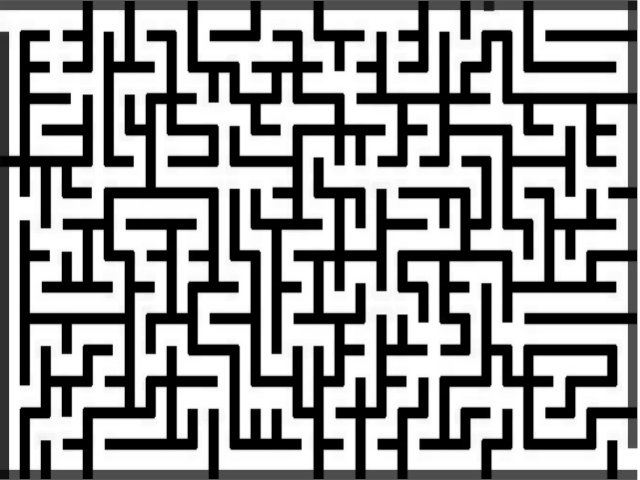

In [49]:
input_img = cv2.imread('input.png',0)
input_img = cv2.resize(input_img, (640, 480)) #width=640, height=480
input_img=cv2.bitwise_not(input_img)
input_img=cv2.dilate(input_img,None,iterations=4)
input_img=cv2.bitwise_not(input_img)
cv2_imshow(input_img)


In [7]:
h,w = input_img.shape

In [8]:
h,w

(480, 640)

In [9]:
#Prepare grid
unite_value=5
grid = np.full((int(np.round(h/unite_value)),int(np.round(w/unite_value))),255) #480/5,640/5 unite 5 pixels for every ;)
grid

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [11]:
#Mark obstracles provided in the input_img image!
for i in range(0,w,unite_value):
  for j in range(0,h,unite_value):
    if(isBlack(i,j,input_img)):
      grid[int(j/unite_value)][int(i/unite_value)]=0


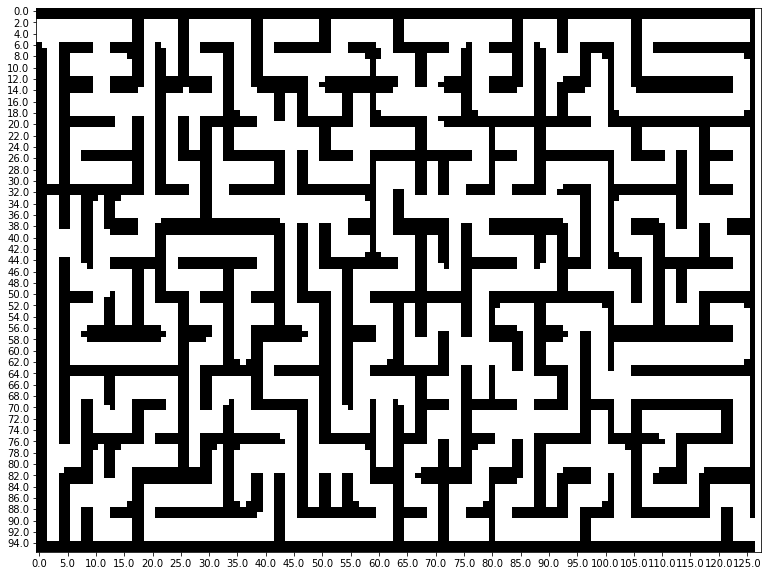

In [12]:
#Show grid to take input_img
plt.figure(figsize=(15,10))
ticks=np.arange(0,w/unite_value,5)
plt.xticks(ticks,ticks)
ticks=np.arange(0,h/unite_value,2)
plt.yticks(ticks,ticks)
plt.imshow(grid,cmap='gray')
plt.show()

In [13]:
grid

array([[  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ...,   0,   0, 255],
       [255, 255, 255, ..., 255,   0, 255],
       ...,
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ...,   0,   0, 255]])

In [21]:
begin = tuple(map(int,input().split()))
end = tuple(map(int,input().split()))
route=astar_solver(begin,end,grid)
route+=[begin]
route=route[::-1]

2 0
92 126


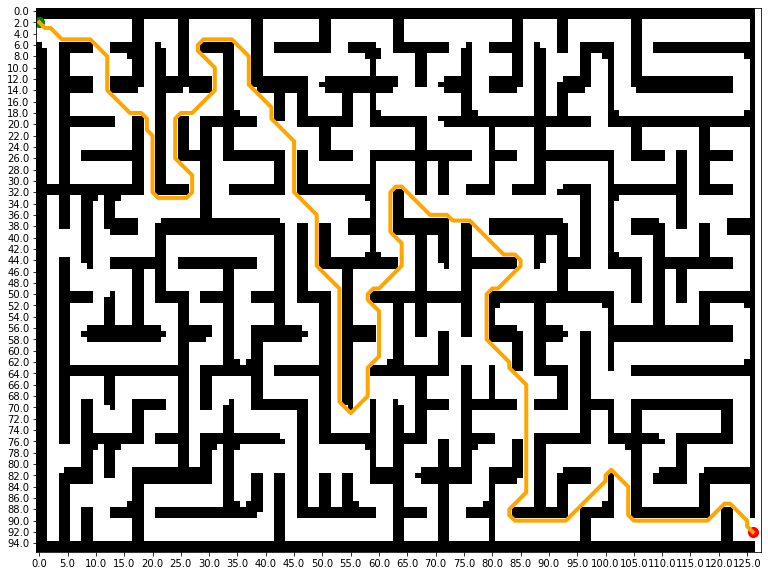

In [42]:
plt.figure(figsize=(15,10))
ticks=np.arange(0,w/unite_value,5)
plt.xticks(ticks,ticks)
ticks=np.arange(0,h/unite_value,2)
plt.yticks(ticks,ticks)
c1 = [r[1] for r in route ]
c2 = [r[0] for r in route ]
plt.plot(c1,c2,'orange',linewidth=4)
plt.scatter(begin[1],begin[0],color='green',s=100)
plt.scatter(end[1],end[0],color='red',s=100)
plt.imshow(grid,cmap='gray')
plt.show()

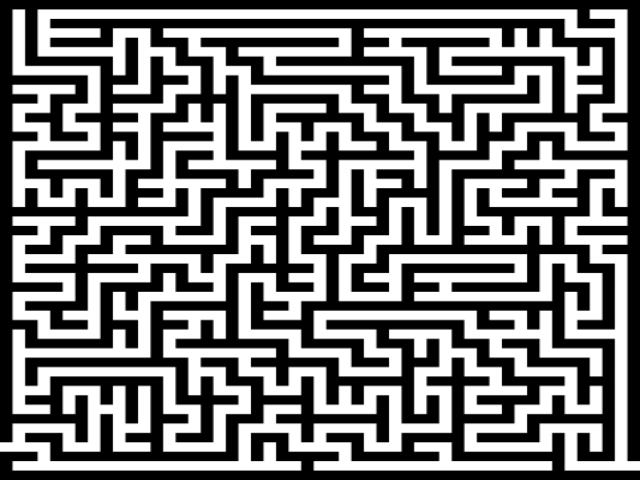

In [103]:
input_img = cv2.imread('maze.png',0)
input_img = cv2.resize(input_img, (640, 480)) #width=640, height=480
input_img=cv2.bitwise_not(input_img)
input_img=cv2.dilate(input_img,None,iterations=0)
input_img=cv2.bitwise_not(input_img)
cv2_imshow(input_img)

In [104]:
h,w = input_img.shape


In [105]:
#Prepare grid
unite_value=3
grid = np.full((int(np.round(h/unite_value)),int(np.round(w/unite_value))),255) #480/5,640/5 unite 5 pixels for every ;)
grid

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [106]:
#Mark obstracles provided in the input_img image!
for i in range(0,w,unite_value):
  for j in range(0,h,unite_value):
    if(isBlack(i,j,input_img)):
      grid[int(j/unite_value)][int(i/unite_value)]=0


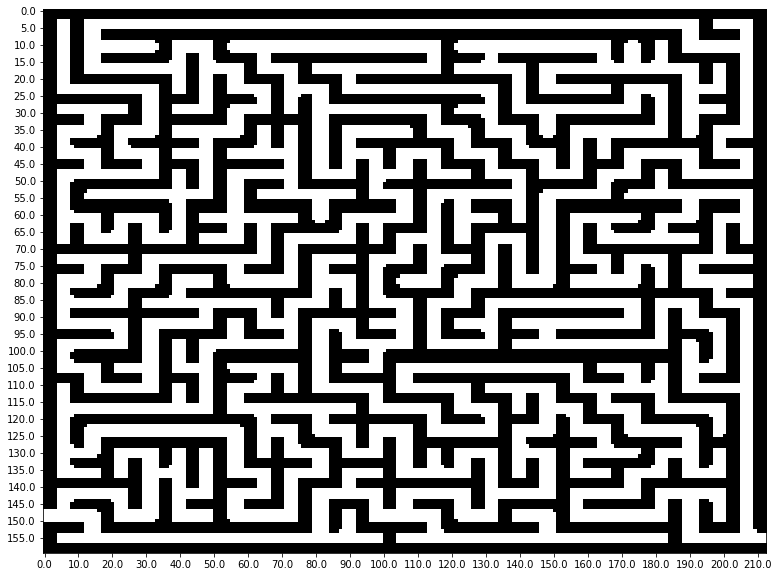

In [107]:
#Show grid to take input_img
plt.figure(figsize=(15,10))
ticks=np.arange(0,w/unite_value,10)
plt.xticks(ticks,ticks)
ticks=np.arange(0,h/unite_value,5)
plt.yticks(ticks,ticks)
plt.imshow(grid,cmap='gray')
plt.show()

In [108]:
begin = tuple(map(int,input().split()))
end = tuple(map(int,input().split()))
route=astar_solver(begin,end,grid)
if route:
  route+=[begin]
  route=route[::-1]
else:
  print("no path found")

5 5
155 210


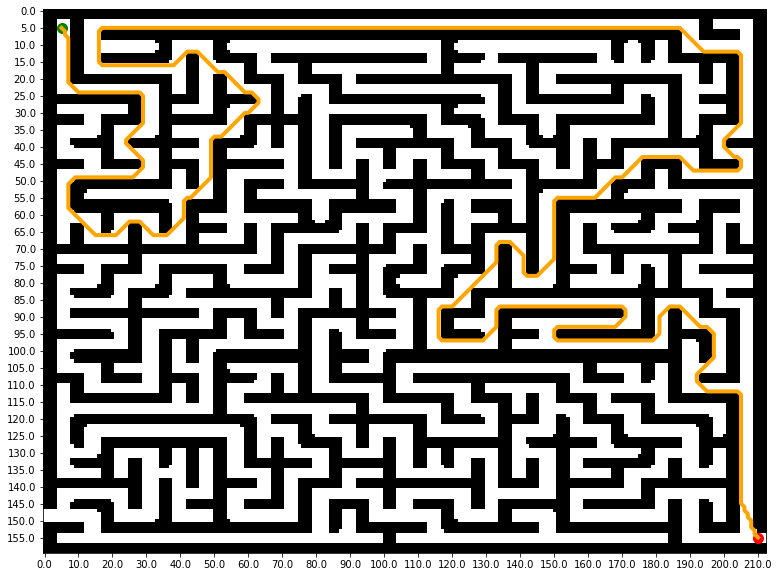

In [109]:
plt.figure(figsize=(15,10))
ticks=np.arange(0,w/unite_value,10)
plt.xticks(ticks,ticks)
ticks=np.arange(0,h/unite_value,5)
plt.yticks(ticks,ticks)
c1 = [r[1] for r in route ]
c2 = [r[0] for r in route ]
plt.plot(c1,c2,'orange',linewidth=4)
plt.scatter(begin[1],begin[0],color='green',s=100)
plt.scatter(end[1],end[0],color='red',s=100)
plt.imshow(grid,cmap='gray')
plt.show()